<h2 align='center'>Tabular Playground Series - Sep 2022</h2>

<center>
<img src="https://www.esri.com/about/newsroom/wp-content/uploads/2021/11/books-wide2.jpg" width='700' height='500'>
</center>
    
This months TPS competition is on forecasting the number of book sales during 2021. 
In particular, we need to predict the number of sales of 4 books that 2 companies sold 
accross 6 countries. It is reminiscent of the TPS January 22 competition that happened earlier 
this year.

In [12]:
# Importing Necessary Libraries
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

#### 1. Data Preprocessing

In [13]:
print(os.listdir('../input/tabular-playground-series-sep-2022'))

['sample_submission.csv', 'train.csv', 'test.csv']


In [14]:
train_df = pd.read_csv('../input/tabular-playground-series-sep-2022/train.csv')

test_df = pd.read_csv('../input/tabular-playground-series-sep-2022/test.csv')

sample_df = pd.read_csv('../input/tabular-playground-series-sep-2022/sample_submission.csv')

In [15]:
print('Number of features in training dataset', train_df.shape[1])

print('Number of examples in training dataset', train_df.shape[0])

Number of features in training dataset 6
Number of examples in training dataset 70128


In [16]:
sample_df.head()

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100


In [17]:
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [18]:
train_df.drop('row_id',axis = 1).groupby('product').describe()

num_sold                                \
                                    count        mean         std   min   
product                                                                   
Kaggle Advanced Techniques        17532.0  223.243783  136.719527  29.0   
Kaggle Getting Started            17532.0  178.924424  108.299137  24.0   
Kaggle Recipe Book                17532.0  134.030173   81.287621  19.0   
Kaggle for Kids: One Smart Goose  17532.0  240.989562  143.162341  36.0   

                                                              
                                    25%    50%    75%    max  
product                                                       
Kaggle Advanced Techniques        114.0  162.0  334.0  889.0  
Kaggle Getting Started             93.0  126.0  272.0  740.0  
Kaggle Recipe Book                 70.0   93.0  203.0  581.0  
Kaggle for Kids: One Smart Goose  129.0  165.0  377.0  986.0

In [19]:
train_df.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [21]:
train_df['country'].value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [23]:
train_df['store'].value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

#### 

In [24]:
ntrain = train_df.shape[0]

ntest = test_df.shape[0]

y_train = train_df['num_sold'].values

test_IDs = test_df['row_id'].copy()

df = pd.concat((train_df, test_df)).reset_index(drop=True)

df.drop(['row_id','num_sold'], axis=1, inplace=True)

print("df size is : {}".format(df.shape))

df size is : (87648, 4)


In [25]:
df.head()

,date,country,store,product
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [26]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['year'] = df['date'].dt.year

df['month'] = df['date'].dt.month

df['day'] = df['date'].dt.day

df['day_of_week'] = df['date'].dt.day_of_week

df['day_of_year'] = df['date'].dt.day_of_year

df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]), 1,0)


In [27]:
df.head()

,date,country,store,product,year,month,day,day_of_week,day_of_year,is_weekend
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,1,1,6,1,1
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,2017,1,1,6,1,1
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,2017,1,1,6,1,1
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,1,1,6,1,1
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,1,1,6,1,1


In [28]:
df.drop('date' , axis = 1 , inplace = True)

#### 2. Label Encoding

In [29]:
categorical_col = ['year','day_of_week' ,'is_weekend' ]

for col in df.columns:
    
    if df[col].dtype in [object, bool] and len(df[col].unique()) <= 50:
        
        categorical_col.append(col)
        
categorical_col

['year', 'day_of_week', 'is_weekend', 'country', 'store', 'product']

In [30]:
df['year'].value_counts()

2020    17568
2017    17520
2018    17520
2019    17520
2021    17520
Name: year, dtype: int64

In [31]:
for col in categorical_col:
    
    df[col] = df[col].astype("category").cat.codes
    
df[categorical_col].head()


,year,day_of_week,is_weekend,country,store,product
0,0,6,1,0,0,0
1,0,6,1,0,0,1
2,0,6,1,0,0,2
3,0,6,1,0,0,3
4,0,6,1,0,1,0


In [32]:
df['year'].value_counts()

3    17568
0    17520
1    17520
2    17520
4    17520
Name: year, dtype: int64

In [33]:
df.head()

,country,store,product,year,month,day,day_of_week,day_of_year,is_weekend
0,0,0,0,0,1,1,6,1,1
1,0,0,1,0,1,1,6,1,1
2,0,0,2,0,1,1,6,1,1
3,0,0,3,0,1,1,6,1,1
4,0,1,0,0,1,1,6,1,1


In [34]:
print('IN',df.columns.map(type))

df.columns = df.columns.astype(str)

print('OUT',df.columns.map(type))

IN Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>],
      dtype='object')
OUT Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>],
      dtype='object')


#### 3. Train-Test Split

In [35]:
train_data = df[:ntrain].copy()

test_data = df[ntrain:]

train_data['num_sold'] = y_train

train_data.shape , test_data.shape


((70128, 10), (17520, 9))

In [36]:
train_data.head()

,country,store,product,year,month,day,day_of_week,day_of_year,is_weekend,num_sold
0,0,0,0,0,1,1,6,1,1,663
1,0,0,1,0,1,1,6,1,1,615
2,0,0,2,0,1,1,6,1,1,480
3,0,0,3,0,1,1,6,1,1,710
4,0,1,0,0,1,1,6,1,1,240


#### 4. Normalizing Target Column - 'num_sold'¶

In [37]:
original_data = train_data['num_sold']

(array([1.963e+03, 3.374e+03, 5.802e+03, 7.091e+03, 6.846e+03, 6.310e+03,
        5.142e+03, 3.363e+03, 2.380e+03, 2.062e+03, 2.093e+03, 2.399e+03,
        2.233e+03, 2.220e+03, 2.208e+03, 2.031e+03, 1.925e+03, 1.777e+03,
        1.654e+03, 1.649e+03, 1.427e+03, 1.099e+03, 8.610e+02, 7.370e+02,
        5.100e+02, 2.790e+02, 2.290e+02, 1.160e+02, 9.900e+01, 6.000e+01,
        4.400e+01, 3.800e+01, 2.300e+01, 1.300e+01, 1.300e+01, 1.100e+01,
        1.000e+01, 7.000e+00, 6.000e+00, 3.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 19.  ,  38.34,  57.68,  77.02,  96.36, 115.7 , 135.04, 154.38,
        173.72, 193.06, 212.4 , 231.74, 251.08, 270.42, 289.76, 309.1 ,
        328.44, 347.78, 367.12, 386.46, 405.8 , 425.14, 444.48, 463.82,
        483.16, 502.5 , 521.84, 541.18, 560.52, 579.86, 599.2 , 618.54,
        637.88, 657.22, 676.56, 695.9 , 715.24, 734.58, 753.92, 773.26,
        792.6 , 

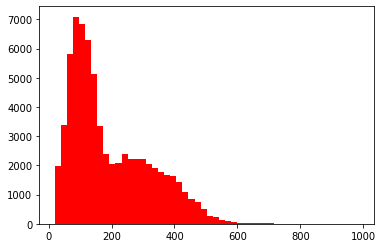

In [38]:
plt.hist( original_data,bins = 50 ,color = 'r')

(array([  50.,  198.,  338.,  524.,  355.,  498.,  581.,  784.,  812.,
         996., 1369., 1348., 1897., 2448., 2279., 3054., 2552., 2874.,
        3159., 2863., 3069., 3123., 2362., 2078., 1646., 1452., 1624.,
        1658., 2037., 2006., 2196., 2248., 2267., 2296., 2178., 2236.,
        2185., 1649., 1266.,  763.,  400.,  178.,  106.,   52.,   26.,
          20.,   12.,    8.,    4.,    4.]),
 array([3.76120012, 3.82433023, 3.88746034, 3.95059045, 4.01372056,
        4.07685067, 4.13998077, 4.20311088, 4.26624099, 4.3293711 ,
        4.39250121, 4.45563132, 4.51876143, 4.58189154, 4.64502165,
        4.70815176, 4.77128187, 4.83441198, 4.89754209, 4.9606722 ,
        5.02380231, 5.08693242, 5.15006253, 5.21319264, 5.27632275,
        5.33945286, 5.40258297, 5.46571308, 5.52884319, 5.5919733 ,
        5.65510341, 5.71823352, 5.78136363, 5.84449374, 5.90762385,
        5.97075396, 6.03388407, 6.09701418, 6.16014429, 6.2232744 ,
        6.28640451, 6.34953462, 6.41266473, 6.47579484, 

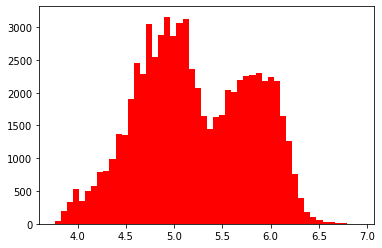

In [39]:
plt.hist(np.log(original_data+24) ,bins = 50 ,color = 'r')

Lambda value used for Transformation: 0.14413786640804235


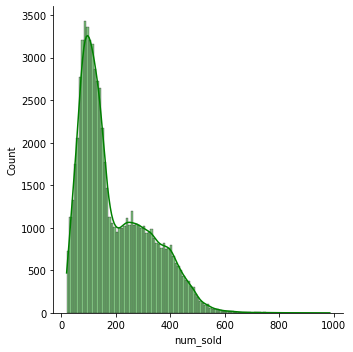

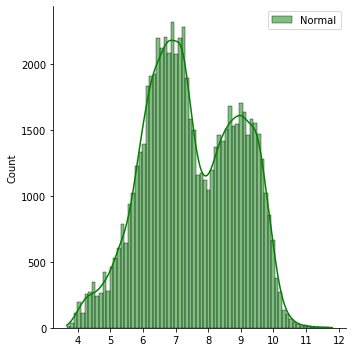

In [40]:
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
from scipy import stats


fitted_data, fitted_lambda = stats.boxcox(original_data)
  

sns.displot(original_data, kde = True,
            label = "Non-Normal", color ="green")
 
sns.displot(fitted_data, kde = True,
            label = "Normal", color ="green")
 
plt.legend(loc = "upper right")
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [41]:
from scipy.stats import norm, skew 

skew(np.log(train_data['num_sold']+24))

-0.002922080325991413

In [42]:
skew(fitted_lambda)

0.0

In [43]:
train_data['num_sold'] = fitted_data

In [44]:
train_data.head()

,country,store,product,year,month,day,day_of_week,day_of_year,is_weekend,num_sold
0,0,0,0,0,1,1,6,1,1,10.759573
1,0,0,1,0,1,1,6,1,1,10.568903
2,0,0,2,0,1,1,6,1,1,9.954557
3,0,0,3,0,1,1,6,1,1,10.935146
4,0,1,0,0,1,1,6,1,1,8.348431


####  5. Model Development¶

In [45]:
X_train = train_data.drop('num_sold', axis = 1)

y_train = train_data.num_sold

X_train.shape , y_train.shape

((70128, 9), (70128,))

In [46]:
import xgboost as xg
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV , cross_val_score ,cross_validate
from sklearn.preprocessing import StandardScaler


In [47]:
scalar = StandardScaler()

pipeline_cat = Pipeline([('transformer', scalar), ('CatBoostRegressor', CatBoostRegressor(random_state=42 , verbose = 0))])
pipeline_xgbr = Pipeline([('transformer', scalar), ('XGBRegressor', xg.XGBRegressor(random_state=42))])
pipeline_lgbm = Pipeline([('transformer', scalar), ('LGBMRegressor', lgb.LGBMRegressor(verbose = -1))])


pipelines = [pipeline_cat, pipeline_xgbr, pipeline_lgbm ]

pipe_dict = {0: 'CatBoostRegressor',
             1: 'XGBRegressor', 2 : 'LGBMRegressor'
            }

In [48]:
original_results = dict()

for i, model in enumerate(pipelines):
    
    cv_score = cross_val_score(model, X_train,y_train, cv=3,scoring='r2')
    
    original_results[pipe_dict[i]] = cv_score


In [49]:
for key , value in sorted(original_results.items(),key=lambda item : item[0][-1]):

    print(key , value) 

CatBoostRegressor [0.9699076  0.99109609 0.64663724]
XGBRegressor [0.95996682 0.98755316 0.64461026]
LGBMRegressor [0.96308151 0.98878701 0.64423147]


#### 6. Using Grid Search¶

In [ ]:
results = dict()

lgbm = lgb.LGBMRegressor(objective ='regression',metric = 'mae',random_state = 42)

params_lgbm = {
    'num_leaves':[26,],
    'learning_rate':[0.1,],     
    'n_estimators':[1000, 99999],
    } 

grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=params_lgbm,verbose = 1, cv = 5,scoring='neg_mean_absolute_error', n_jobs=-1).fit(X_train, y_train.values.ravel())

lgbm_best = grid_search_lgbm.best_estimator_

print('lgbm Regressor Best Parmas',grid_search_lgbm.best_params_)

results['lgbm Regressor Accuracy'] = cross_val_score(lgbm_best,X_train, y_train.values.ravel(), cv=3,scoring='neg_mean_absolute_error' ).mean()

print('lgbm Regressor Accuracy', results['lgbm Regressor Accuracy'])


Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [51]:
pipeline = Pipeline([('transformer', scalar), ('estimator', lgbm_best)])

cv_results = cross_validate(pipeline, X_train, y_train, cv=5, 
                            scoring='r2', return_train_score=True, return_estimator=True)

np.mean(cv_results['test_score'])

0.9807079929871734

In [52]:
scores = np.zeros(test_df.shape[0])

for estimator in cv_results['estimator']:
    
    scores += inv_boxcox(estimator.predict(test_data), fitted_lambda)
    
scores /= len(cv_results['estimator'])


In [53]:
sub = pd.DataFrame()

sub['row_id'] = test_IDs

sub['num_sold'] = scores

sub.to_csv('submission.csv',index=False)

sub.head()

,row_id,num_sold
0,70128,472.619308
1,70129,367.970933
2,70130,312.801440
3,70131,516.777549
4,70132,164.824193
